# Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [4]:
# Create folder path
path = r'/Users/madelinegamache/Documents/InstaCart Basket Analysis'

In [5]:
path

'/Users/madelinegamache/Documents/InstaCart Basket Analysis'

In [6]:
# Import 'orders_products_aggregated.pkl' from previous exercise
ords_prods_grouped = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

In [7]:
# Check output
ords_prods_grouped.head()

,order_id,user_id,order_number,weekday_order_placed,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_orders,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


## Creating Bar Charts

<Axes: >

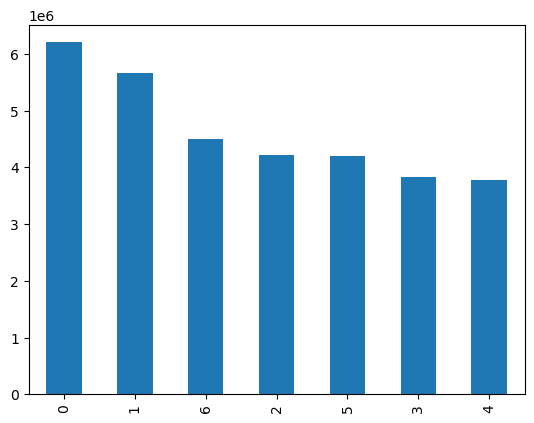

In [8]:
# Create bar chart
ords_prods_grouped['weekday_order_placed'].value_counts().plot.bar()

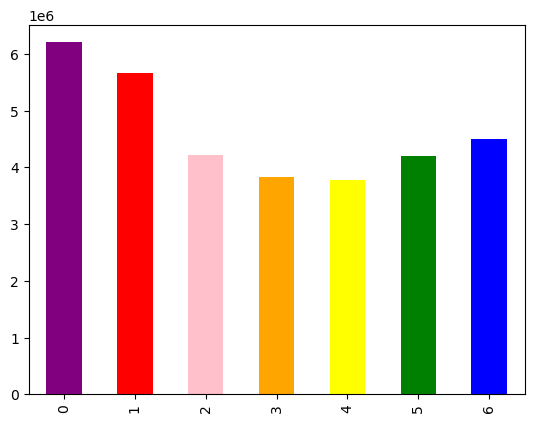

In [10]:
# Sort numerically (0-6)
# Add color
bar = ords_prods_grouped['weekday_order_placed'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

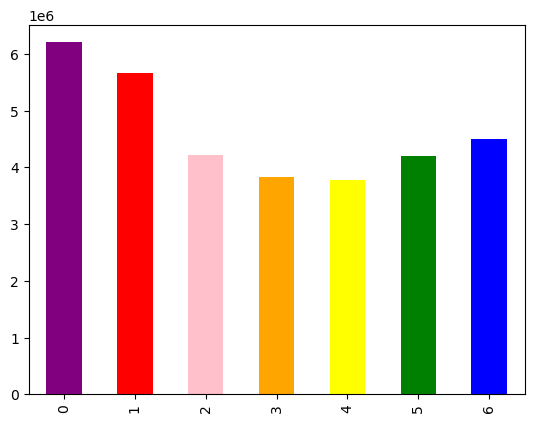

In [11]:
bar.figure

## Exporting Charts

In [12]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

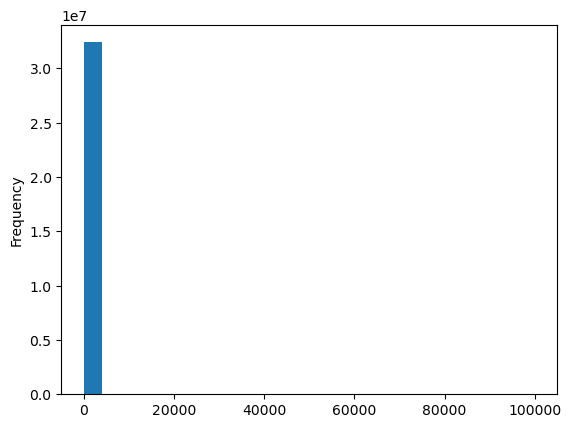

In [13]:
ords_prods_grouped['prices'].plot.hist(bins = 25)

In [14]:
# Checking data consistency for 'prices' column
ords_prods_grouped['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

#### Need to further investigate max price

In [15]:
# Check max price
ords_prods_grouped['prices'].max()

99999.0

In [16]:
# Check mean price
ords_prods_grouped['prices'].mean()

11.980225638383454

In [17]:
# Check median price
ords_prods_grouped['prices'].median()

7.4

In [19]:
# Check min price
ords_prods_grouped['prices'].min()

1.0

#### Observation: Max price seems unrealistically high at 99,999.0. Mean, Median, and Min fall within realistic price range.

<Axes: xlabel='prices', ylabel='prices'>

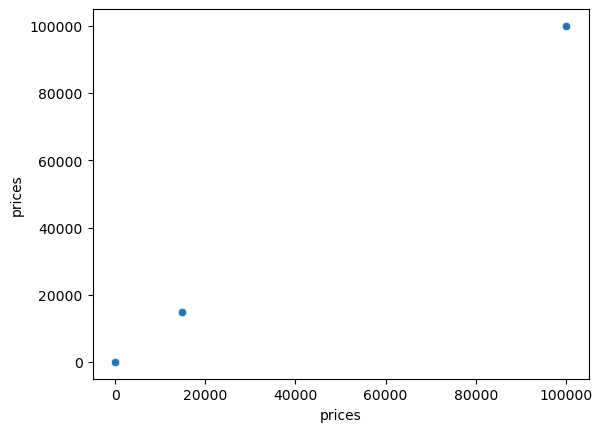

In [23]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_grouped)

In [24]:
# Explore 'prices' further to investigate outlier near 20,000
ords_prods_grouped.loc[ords_prods_grouped['prices'] > 100]

,order_id,user_id,order_number,weekday_order_placed,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_orders,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,NaN,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,NaN,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,NaN,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,NaN,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,NaN,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,NaN,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,NaN,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,NaN,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,NaN,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [25]:
ords_prods_grouped.loc[ords_prods_grouped['prices'] >100, 'prices'] = np.nan

In [26]:
ords_prods_grouped['prices'].max()

25.0

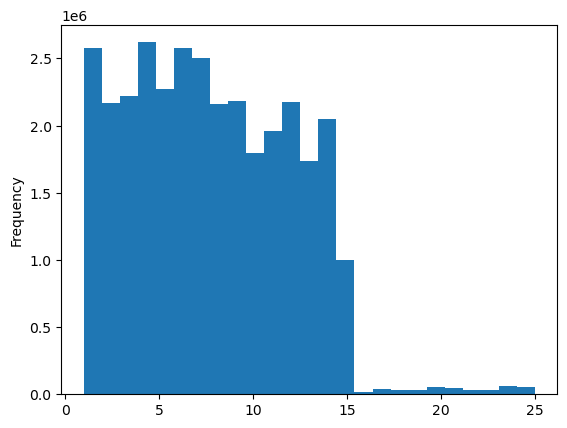

In [27]:
# Create histogram reflecting accurate 'prices' column
hist = ords_prods_grouped['prices'].plot.hist(bins = 25)

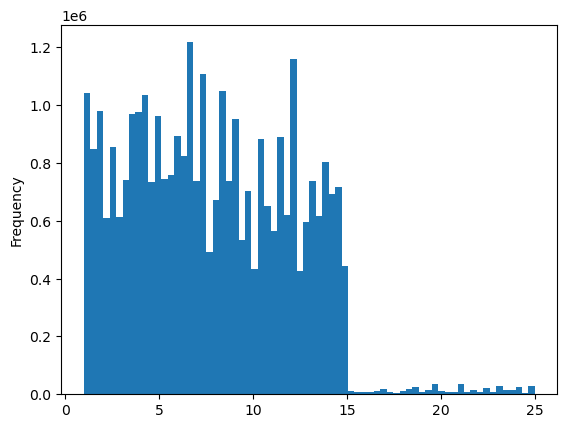

In [29]:
hist_2 = ords_prods_grouped['prices'].plot.hist(bins = 70)

In [32]:
# Export the histogram
hist.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hist_prices_70.png' ))

## Creating Line Charts

In [30]:
df = ords_prods_grouped[:2000000]

In [31]:
df.shape

(2000000, 25)

In [33]:
# Create a line chart
# Creating a random sample 
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [34]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [35]:
np.random.rand(10)

array([0.92968185, 0.30857685, 0.79951561, 0.38580061, 0.90966021,
       0.47831801, 0.23065977, 0.83967053, 0.04511225, 0.15493   ])

In [40]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_grouped)) <= 0.7

In [41]:
# Store 70% of sample in the dataframe big
big = ords_prods_grouped[dev]

In [42]:
# Store 30% of sample in the dataframe small
small = ords_prods_grouped[~dev]

In [44]:
# Check length of the entire dataframe
len(ords_prods_grouped)

32404859

In [45]:
# Check length of the sample dataframe 70% big and 30% small

len(big)+len(small)

32404859

In [46]:
# Create subset of relevant columns 'weekday_order_placed' and 'prices'
df_2 = small[['weekday_order_placed','prices']]

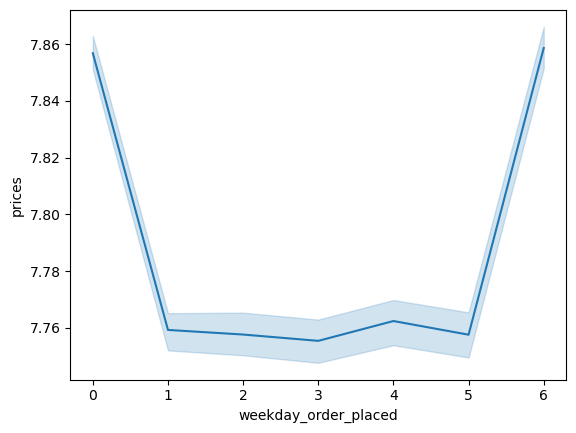

In [47]:
# Creates the line graph
line = sns.lineplot(data = df_2, x = 'weekday_order_placed',y = 'prices')

In [48]:
# Export the line chart
line.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_ords_dow.png' ))

In [49]:
# Export data to pkl
ords_prods_grouped.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_grouped_new.pkl'))